In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option("display.max_rows",10, "display.max_columns",20)

In [39]:
movie = pd.read_csv('data/movie.csv', index_col = "movie_title")
movie

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Signed Sealed Delivered,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
The Following,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
A Plague So Pleasant,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16


In [19]:
movie_2_hours = movie['duration']>120
movie_2_hours.head()

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
Name: duration, dtype: bool

In [21]:
 movie_2_hours.sum() # Number of movies greater than 2 hours might be true. But the other case is not.
# All NaN is also false. Best way is to drop NaN values

1039

In [27]:
movie['duration'].dropna().gt(120).mean()

0.21199755152009794

In [25]:
movie_2_hours.describe()

count      4916
unique        2
top       False
freq       3877
Name: duration, dtype: object

In [26]:
#another method for mean
movie_2_hours.value_counts(normalize=True)

False    0.788649
True     0.211351
Name: duration, dtype: float64

In [34]:
actors = movie[['actor_1_facebook_likes','actor_2_facebook_likes']].dropna()
actors

,actor_1_facebook_likes,actor_2_facebook_likes
movie_title,,
Avatar,1000.0,936.0
Pirates of the Caribbean: At World's End,40000.0,5000.0
Spectre,11000.0,393.0
The Dark Knight Rises,27000.0,23000.0
Star Wars: Episode VII - The Force Awakens,131.0,12.0
...,...,...
Signed Sealed Delivered,637.0,470.0
The Following,841.0,593.0
A Plague So Pleasant,0.0,0.0


In [46]:
(actors['actor_1_facebook_likes']>actors['actor_2_facebook_likes']).value_counts(normalize = True).round(3)

True     0.978
False    0.022
dtype: float64

# Constructing multiple boolean conditions

In [50]:
criteria1 = movie['imdb_score']>8
criteria2 = movie['content_rating']=='PG-13'
criteria3 = (movie['title_year']<2000) | (movie['title_year']>2009) #Wrap in paranthesis, else error

In [51]:
criteria_final = criteria1 & criteria2 & criteria3

# Filtering with boolean indexing

In [52]:
crit_a1 = movie.imdb_score > 8
crit_a2 = movie.content_rating == 'PG-13'
crit_a3 = (movie.title_year < 2000) | (movie.title_year > 2009)
final_crit_a = crit_a1 & crit_a2 & crit_a3

In [53]:
crit_b1 = movie.imdb_score < 5
crit_b2 = movie.content_rating == 'R'
crit_b3 = ((movie.title_year >= 2000) &(movie.title_year <= 2010))
final_crit_b = crit_b1 & crit_b2 & crit_b3

In [54]:
final_crit_all = final_crit_a | final_crit_b
final_crit_all.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [55]:
movie[final_crit_all]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000
Interstellar,Color,Christopher Nolan,712.0,169.0,22000.0,6000.0,Anne Hathaway,11000.0,187991439.0,Adventure|Drama|Sci-Fi,...,2725.0,English,USA,PG-13,165000000.0,2014.0,11000.0,8.6,2.35,349000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Young Unknowns,Color,Catherine Jelski,13.0,87.0,0.0,258.0,Eion Bailey,1000.0,58163.0,Drama,...,3.0,English,USA,R,NaN,2000.0,749.0,4.2,NaN,4
Bled,Color,Christopher Hutson,8.0,95.0,3.0,118.0,Jennifer Lee Wiggins,717.0,NaN,Horror,...,30.0,English,USA,R,750000.0,2009.0,134.0,3.1,1.85,128
Hoop Dreams,Color,Steve James,53.0,170.0,23.0,2.0,Arthur Agee,7.0,7830611.0,Documentary|Drama|Sport,...,74.0,English,USA,PG-13,700000.0,1994.0,6.0,8.3,1.33,0


In [63]:
cols =['imdb_score','title_year','content_rating']
movie_filtered = movie.loc[final_crit_all, cols]
movie_filtered

,imdb_score,title_year,content_rating
movie_title,,,
The Dark Knight Rises,8.5,2012.0,PG-13
The Avengers,8.1,2012.0,PG-13
Captain America: Civil War,8.2,2016.0,PG-13
Guardians of the Galaxy,8.1,2014.0,PG-13
Interstellar,8.6,2014.0,PG-13
...,...,...,...
The Young Unknowns,4.2,2000.0,R
Bled,3.1,2009.0,R
Hoop Dreams,8.3,1994.0,PG-13


# Replicating boolean indexing with index selection

In [102]:
college = pd.read_csv("data/college.csv")
college

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
0,Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
1,University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
2,Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
3,University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
4,Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7530,SAE Institute of Technology San Francisco,Emeryville,CA,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,9500
7531,Rasmussen College - Overland Park,Overland Park,KS,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,21163
7532,National Personal Training Institute of Cleveland,Highland Heights,OH,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,6333
7533,Bay Area Medical Academy - San Jose Satellite ...,San Jose,CA,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed


In [85]:
%timeit college[college['STABBR']=='TX']

496 µs ± 6.54 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [84]:
%timeit college2 = college.set_index('STABBR')
%timeit college2.loc['TX',:]

484 µs ± 14.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
258 µs ± 1.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [87]:
states = ['TX', 'CA', 'NY']
%timeit college[college['STABBR'].isin(states)]
%timeit college2.loc[states,:]

595 µs ± 4.44 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
718 µs ± 24.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Selecting with unique and sorted indexes

In [90]:
# Index selection performance drastically improves when the index is unique or sorted
college2.index.is_monotonic #check whether the index is sorted

False

In [92]:
college3 = college2.sort_index()
college3.index.is_monotonic

True

In [97]:
%timeit college[college['STABBR']=='TX']

515 µs ± 6.05 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [98]:
%timeit college3.loc["TX",:] #sorted index with minimum time using Binary search

55.7 µs ± 872 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [99]:
%timeit college2.loc["TX",:]

256 µs ± 2.21 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [104]:
#unique index
college_unique = college.set_index('INSTNM')
college_unique.index.is_unique

True

In [106]:
%timeit college[college['INSTNM']=="Stanford University"]

439 µs ± 7.63 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [107]:
%timeit college_unique.loc['Stanford University'] #if nique, uses hash table. Almost same time for all length of indexes

74.8 µs ± 1.61 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [108]:
college_unique_sorted = college_unique.sort_index()
%timeit college_unique_sorted.loc['Stanford University']

74.7 µs ± 1.29 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [110]:
college.index = college['CITY'] + ', ' + college['STABBR']
college.sort_index()
college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"Normal, AL",Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
"Birmingham, AL",University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
"Montgomery, AL",Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
"Huntsville, AL",University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
"Montgomery, AL",Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5


In [111]:
%timeit college.loc['Miami, FL']
%timeit college[(college['CITY']=="Miami") & (college['STABBR']=="FL")]

180 µs ± 5.94 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
867 µs ± 24.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Gaining perspective on stock prices

In [114]:
slb = pd.read_csv('data/slb_stock.csv',index_col='Date', parse_dates=['Date'])
slb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,66.39,67.20,66.12,67.11,5771234
2010-01-05,66.99,67.62,66.73,67.30,7366270
2010-01-06,67.17,68.94,67.03,68.80,9949946
2010-01-07,68.49,69.81,68.21,69.51,7700297
2010-01-08,69.19,72.00,69.09,70.65,13487621


In [126]:
slb_close = slb['Close']

In [122]:
slb_summary = slb['Close'].describe(percentiles = [.1,.9])

In [124]:
slb_summary[['10%','90%']]

10%    64.892
90%    93.248
Name: Close, dtype: float64

In [128]:
upper_10 = slb_summary['90%']
lower_10 = slb_summary['10%']
criteria = (slb_close>upper_10) | (slb_close<lower_10)

In [129]:
criteria

Date
2010-01-04    False
2010-01-05    False
2010-01-06    False
2010-01-07    False
2010-01-08    False
              ...  
2017-07-10    False
2017-07-11    False
2017-07-12    False
2017-07-13    False
2017-07-14    False
Name: Close, Length: 1895, dtype: bool

In [130]:
slb_top_bottom_10 = slb_close[criteria]

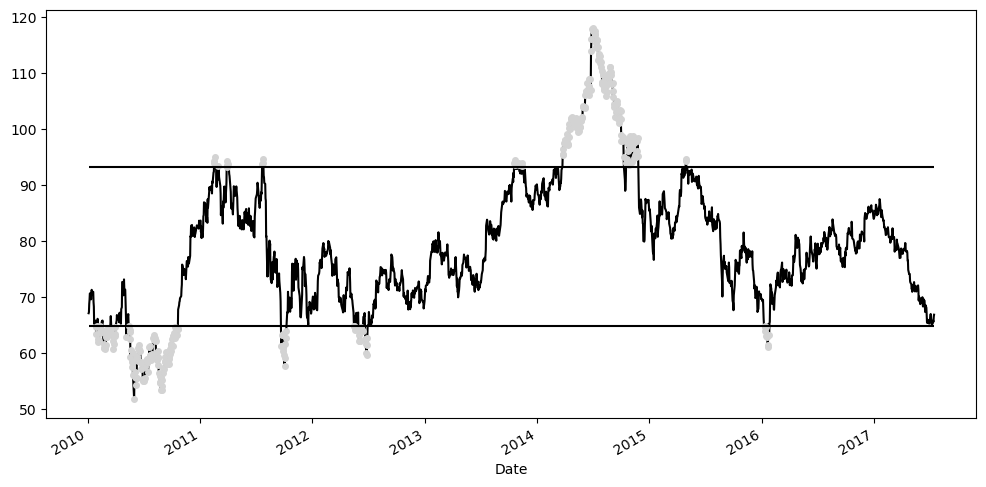

In [132]:
slb_close.plot(color='black', figsize=(12,6))
slb_top_bottom_10.plot(marker='o', style=' ', ms=4, color='lightgray')
xmin = criteria.index[0]
xmax = criteria.index[-1]
plt.hlines(y=[lower_10, upper_10], xmin=xmin,xmax=xmax, color='black')

# Translating SQL WHERE clauses

In [10]:
employee = pd.read_csv("data/employee.csv")


,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22
...,...,...,...,...,...,...,...,...,...,...
1995,1995,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-06-09,2015-06-09
1996,1996,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),66523.0,Black or African American,Full Time,Male,Active,2003-09-02,2013-10-06
1997,1997,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-10-13,2015-10-13
1998,1998,POLICE OFFICER,Houston Police Department-HPD,55461.0,Asian/Pacific Islander,Full Time,Male,Active,2009-01-20,2011-07-02


In [27]:
employee.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
UNIQUE_ID,2000.0,999.500000,577.494589,0.0,499.75,999.5,1499.25,1999.0
BASE_SALARY,1886.0,55767.931601,21693.706679,24960.0,40170.00,54461.0,66614.00,275000.0


In [31]:
criteria1_department = employee['DEPARTMENT'].isin(['Houston Police Department-HPD','Houston Fire Department (HFD)'])
criteris2_gender = employee['GENDER']=='Female'
criteria3_salary = (employee['BASE_SALARY'] >= 80000) & (employee['BASE_SALARY'] < 120000)

In [32]:
final_crit = criteria1_department&criteris2_gender&criteria3_salary
final_crit.value_counts(normalize = True)

False    0.9935
True     0.0065
dtype: float64

In [33]:
select_cols = ['UNIQUE_ID', 'DEPARTMENT', 'GENDER', 'BASE_SALARY']
employee.loc[final_crit, select_cols]

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0
564,564,Houston Police Department-HPD,Female,81239.0
595,595,Houston Police Department-HPD,Female,99953.0
937,937,Houston Police Department-HPD,Female,81239.0
954,954,Houston Police Department-HPD,Female,91181.0
1118,1118,Houston Police Department-HPD,Female,104455.0


In [35]:
#Other methods
criteria_sal = employee.BASE_SALARY.between(80000, 120000) #equivalent to sql between
criteria_sal

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: BASE_SALARY, Length: 2000, dtype: bool

In [36]:
top_5_department = employee['DEPARTMENT'].value_counts().index[:5]
top_5_department

Index(['Houston Police Department-HPD', 'Houston Fire Department (HFD)',
       'Public Works & Engineering-PWE', 'Health & Human Services',
       'Houston Airport System (HAS)'],
      dtype='object')

In [38]:
criteria_top5dept = employee['DEPARTMENT'].isin(top_5_department)
employee[criteria_top5dept]

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
5,5,SENIOR POLICE OFFICER,Houston Police Department-HPD,66614.0,Black or African American,Full Time,Male,Active,1984-11-26,2005-03-26
6,6,ENGINEER,Public Works & Engineering-PWE,71680.0,Asian/Pacific Islander,Full Time,Male,Active,2012-03-26,2012-03-26
7,7,CARPENTER,Houston Airport System (HAS),42390.0,White,Full Time,Male,Active,2013-11-04,2013-11-04
...,...,...,...,...,...,...,...,...,...,...
1995,1995,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-06-09,2015-06-09
1996,1996,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),66523.0,Black or African American,Full Time,Male,Active,2003-09-02,2013-10-06
1997,1997,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-10-13,2015-10-13
1998,1998,POLICE OFFICER,Houston Police Department-HPD,55461.0,Asian/Pacific Islander,Full Time,Male,Active,2009-01-20,2011-07-02


# Determining the normality of stock market returns

In [39]:
amzn = pd.read_csv("data/amzn_stock.csv", index_col= 'Date', parse_dates=['Date'])
amzn.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [41]:
amzn_daily_return = amzn.Close.pct_change()
amzn_daily_return = amzn_daily_return.dropna()

<AxesSubplot:>

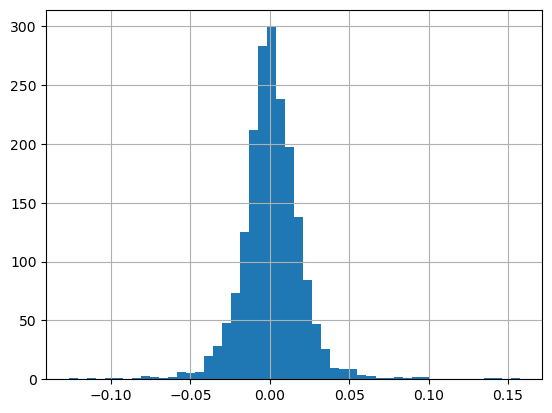

In [43]:
amzn_daily_return.hist(bins=50)

In [44]:
mean = amzn_daily_return.mean()
std = amzn_daily_return.std()

In [45]:
abz_z_score = amzn_daily_return.sub(mean).abs().div(std)

In [51]:
pcts = [abz_z_score.lt(i).mean() for i in range(1,4)]
pcts

[0.7873350923482849, 0.9562005277044855, 0.9846965699208443]

In [50]:
print('{:.3f} fall within 1 standard deviation. ''{:.3f} within 2 and {:.3f} within 3'.format(*pcts))

0.787 fall within 1 standard deviation. 0.956 within 2 and 0.985 within 3


# Improving readability of boolean indexing with the query method

# Preserving Series with the where method

In [53]:
#Movie dataset
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
fb_likes = movie['actor_1_facebook_likes'].dropna()


In [56]:
fb_likes.describe(percentiles=[.1,.25,.5,.75,.9,.99]).to_frame().T

,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
actor_1_facebook_likes,4909.0,6494.488491,15106.986884,0.0,240.0,607.0,982.0,11000.0,18000.0,44920.0,640000.0


<AxesSubplot:>

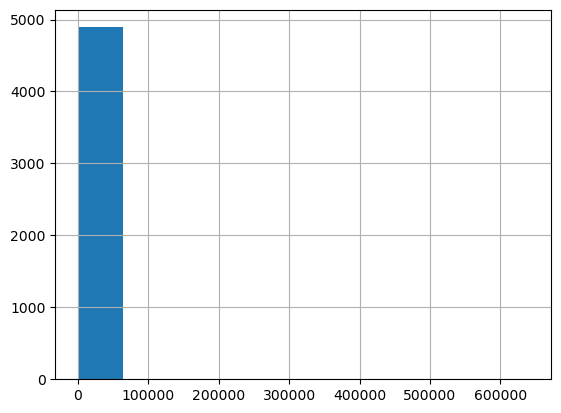

In [57]:
fb_likes.hist()

In [58]:
criteria_high = fb_likes<20000
criteria_high.mean()

0.9085353432470972

In [65]:
criteria_low = fb_likes>300

In [62]:
fb_likes.where(criteria_high,other = 20000)

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      131.0
                                               ...   
Signed Sealed Delivered                         637.0
The Following                                   841.0
A Plague So Pleasant                              0.0
Shanghai Calling                                946.0
My Date with Drew                                86.0
Name: actor_1_facebook_likes, Length: 4909, dtype: float64

<AxesSubplot:>

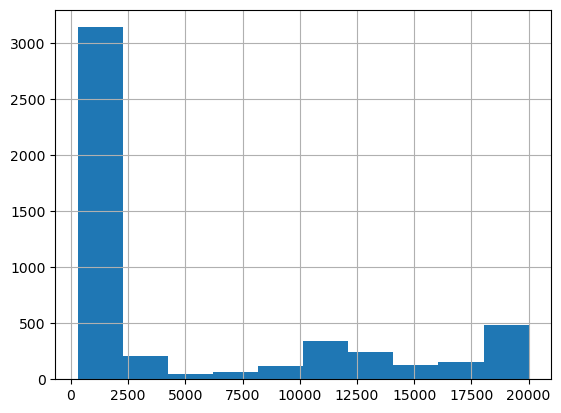

In [66]:
fb_likes_cap = fb_likes.where(criteria_high, other=20000).where(criteria_low, other = 300)
fb_likes_cap.hist()

In [67]:
#Pandas has clip, clip_lower, clip_pper
fb_likes_clip = fb_likes.clip(lower=300, upper=20000)
fb_likes_cap.equals(fb_likes_clip)

True

# Masking DataFrame rows

In [3]:
movie=  pd.read_csv('data/movie.csv', index_col='movie_title')

In [4]:
c1 = movie['title_year'] >=2010
c2 = movie['title_year'].isnull()
criteria = c1 | c2

In [5]:
criteria

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens     True
                                              ...  
Signed Sealed Delivered                        True
The Following                                  True
A Plague So Pleasant                           True
Shanghai Calling                               True
My Date with Drew                             False
Name: title_year, Length: 4916, dtype: bool

In [6]:
movie.mask(criteria).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spectre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Dark Knight Rises,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
movie.mask(criteria).dropna()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0.0
Harry Potter and the Half-Blood Prince,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000.0
Superman Returns,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,...,2367.0,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Clean,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,...,39.0,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171.0
The Circle,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,...,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697.0
Primer,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000.0


# Selecting with booleans, integer location, and labels